# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt

Anime_df= pd.read_csv("animeclean.csv")
Manga_df = pd.read_csv("Mangaclean.csv")

In [8]:
Anime_df.shape

(18344, 25)

In [9]:
Manga_df.shape

(66601, 21)

In [10]:
Manga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66601 entries, 0 to 66600
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             66601 non-null  int64  
 1   id                     66601 non-null  int64  
 2   title                  66601 non-null  object 
 3   media_type             66601 non-null  object 
 4   mean                   21660 non-null  float64
 5   num_scoring_users      66601 non-null  int64  
 6   status                 66601 non-null  object 
 7   num_volumes            50266 non-null  float64
 8   num_chapters           46752 non-null  float64
 9   start_date             62351 non-null  object 
 10  end_date               51411 non-null  object 
 11  num_list_users         66601 non-null  int64  
 12  popularity             59393 non-null  float64
 13  num_favorites          66601 non-null  int64  
 14  rank                   40872 non-null  float64
 15  ge

In [11]:
Anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18344 entries, 0 to 18343
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18344 non-null  int64  
 1   id                        18344 non-null  int64  
 2   title                     18344 non-null  object 
 3   media_type                18344 non-null  object 
 4   mean                      11540 non-null  float64
 5   num_scoring_users         18344 non-null  int64  
 6   status                    18344 non-null  object 
 7   num_episodes              18188 non-null  float64
 8   start_date                16196 non-null  object 
 9   end_date                  15277 non-null  object 
 10  source                    15088 non-null  object 
 11  num_list_users            18344 non-null  int64  
 12  popularity                15769 non-null  float64
 13  num_favorites             18344 non-null  int64  
 14  rank  

In [68]:
Anime_df.isnull().sum()

Unnamed: 0                      0
id                              0
title                           0
media_type                      0
mean                         6804
num_scoring_users               0
status                          0
num_episodes                  156
start_date                   2148
end_date                     3067
source                       3256
num_list_users                  0
popularity                   2575
num_favorites                   0
rank                         3977
average_episode_duration      227
rating                        484
start_season_year            5026
start_season_season          5026
genres                          0
studios                         0
synopsis                     2396
created_at                      0
updated_at                      0
alternative_titles_en       11169
dtype: int64

In [69]:
Manga_df.isnull().sum()

Unnamed: 0                   0
id                           0
title                        0
media_type                   0
mean                     44941
num_scoring_users            0
status                       0
num_volumes              16335
num_chapters             19849
start_date                4250
end_date                 15190
num_list_users               0
popularity                7208
num_favorites                0
rank                     25729
genres                       0
authors                      0
synopsis                 21515
created_at                   0
updated_at                   0
alternative_titles_en    48445
dtype: int64

In [76]:
A_df = Anime_df.dropna()
#have to get rid of the null values or the statsmodels won't work

In [77]:
M_df = Manga_df.dropna()

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

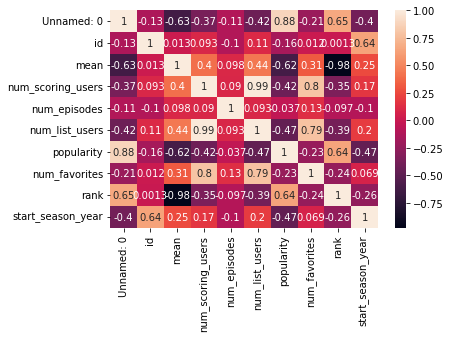

In [78]:
sb.heatmap(A_df.corr(),annot=True)
plt.show()

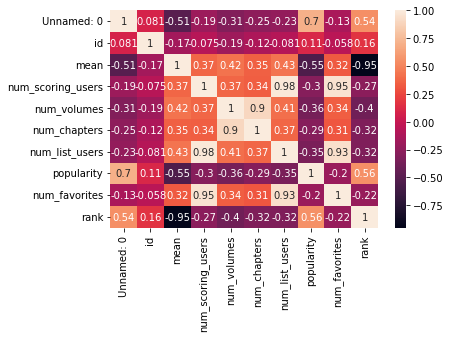

In [79]:
sb.heatmap(M_df.corr(),annot=True)
plt.show()

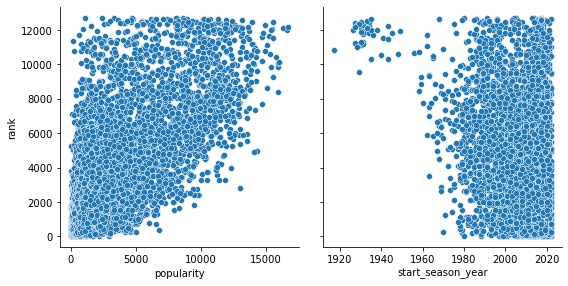

In [80]:
sb.pairplot(A_df, x_vars=['popularity', 'start_season_year'], 
             y_vars=['rank'], height=4, aspect=1, kind='scatter')
plt.show()

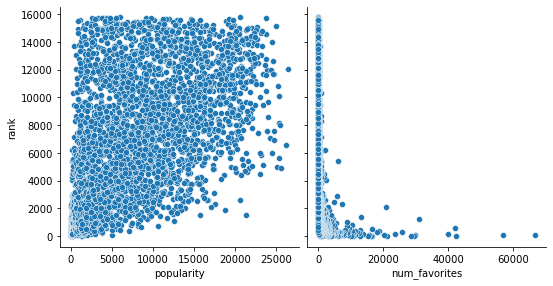

In [81]:
sb.pairplot(M_df, x_vars=['popularity', 'num_favorites'], 
             y_vars=['rank'], height=4, aspect=1, kind='scatter')
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [83]:
x = A_df['num_episodes']
y = A_df['start_season_year']

In [84]:
xm = M_df['popularity']
ym = M_df['rank']

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [95]:
print(x_train)
print(y_train)

5757    26.0
2554    12.0
1296     1.0
1135    12.0
3399     1.0
        ... 
8182     1.0
2228     6.0
366     38.0
82      24.0
7292    26.0
Name: num_episodes, Length: 3327, dtype: float64
5757    2017.0
2554    2015.0
1296    2010.0
1135    2011.0
3399    2018.0
         ...  
8182    1926.0
2228    2012.0
366     2002.0
82      2018.0
7292    1998.0
Name: start_season_year, Length: 3327, dtype: float64


In [96]:
from sklearn.model_selection import train_test_split
xm_train, x_test, ym_train, y_test = train_test_split(xm, ym, train_size = 0.7, test_size = 0.3, random_state = 100)

In [121]:
print(xm_train)
print(ym_train)

6882      5873.0
2434      1813.0
12871    14841.0
42794     8448.0
282        287.0
          ...   
5685      5967.0
133        167.0
5332      5917.0
11364    16054.0
4022      4679.0
Name: popularity, Length: 2653, dtype: float64
6882      5478.0
2434     12828.0
12871     6895.0
42794    13778.0
282        128.0
          ...   
5685      2955.0
133        169.0
5332     15159.0
11364     8645.0
4022      4631.0
Name: rank, Length: 2653, dtype: float64


In [122]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

C:\Users\Riku\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [123]:
lr = sm.OLS(y_train, x_train_sm).fit()

lr.params

const           2007.704244
num_episodes      -0.043035
dtype: float64

In [124]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      start_season_year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     28.29
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.12e-07
Time:                        15:01:32   Log-Likelihood:                -13391.
No. Observations:                3327   AIC:                         2.679e+04
Df Residuals:                    3325   BIC:                         2.680e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2007.7042      0.264   7612.190      0.000    2007.187    2008.221
num_episodes    -0.0430      0.008     -5.318      0.000      -0.059      -0.027
==============================================================================
Omnibus:                     1705.549   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13322.659
Skew:                          -2.322   Prob(JB):                         0.00
Kurtosis:                      11.633   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
xm_train_sm = sm.add_constant(xm_train)

C:\Users\Riku\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [126]:
lr = sm.OLS(ym_train, xm_train_sm).fit()

lr.params

const         3448.379632
popularity       0.405248
dtype: float64

In [127]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     1150.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          1.11e-209
Time:                        15:01:34   Log-Likelihood:                -25635.
No. Observations:                2653   AIC:                         5.127e+04
Df Residuals:                    2651   BIC:                         5.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3448.3796    117.363     29.382      0.000    3218.247    3678.512
popularity     0.4052      0.012     33.909      0.000       0.382       0.429
==============================================================================
Omnibus:                      186.845   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.888
Skew:                           0.718   Prob(JB):                     3.27e-50
Kurtosis:                       2.968   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

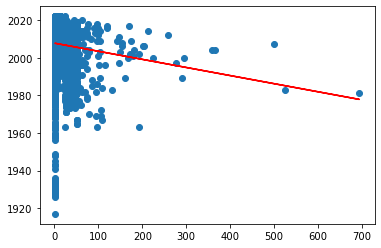

In [128]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 2007.704244 + -0.043035*x_train, 'r')
plt.show()

In [129]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

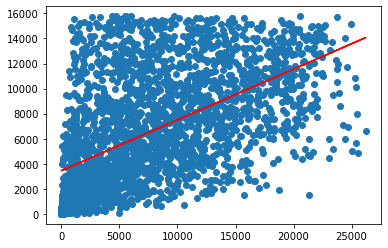

In [130]:
plt.scatter(xm_train, ym_train)
plt.plot(xm_train, 3448.379632 + 0.405248*xm_train, 'r')
plt.show()

In [131]:
ym_train_pred = lr.predict(xm_train_sm)
res = (ym_train - ym_train_pred)

## Error Terms

Finally, plot your error terms!

C:\Users\Riku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


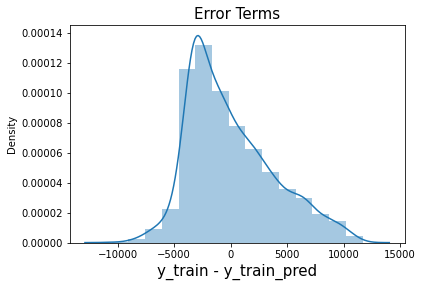

In [132]:
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

C:\Users\Riku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


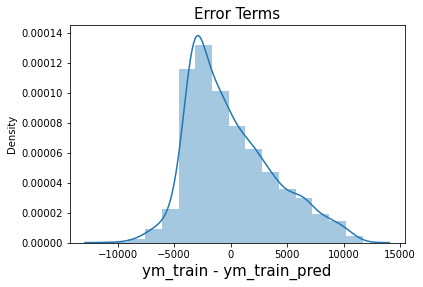

In [133]:
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('ym_train - ym_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value?0.008 for anime dataset and 0.303 for manga dataset.
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case. The datset I used was not the best for this since it had too many NAN values which i believe changed the outcome. 
3. Was your plot of the error terms a bell curve? not exacly, it's pretty skewed, leaning too much to be a bell curve for either dataset.